In [1]:
import pandas as pd

import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Closed set multiclass on train and dev

Train on 75% of train set

Grid search on 25$ of train set

Eval on dev set

In [6]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/closed_set_multiclass_eval'


In [17]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features = ['lpc', 'bicoh', 'unet']
#selected_features = ['bicoh']
number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore", "l2"]
classifiers_keys = ["svm", "rf"]


In [18]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])

for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

            result_name = result_name + "_selected_features_" + "-".join(
                s for s in selected_features) + ".npy"

            result_filename = os.path.join(result_root_path, result_name)

            if os.path.exists(result_filename):
                result_dict = pickle.load(open(result_filename, "rb" ))
                cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                           normalize='true')
                cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                         normalize='true')
                cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                          normalize='true')

                acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                       number_lpc_order, stop_lpc_order,
                                                       n, c, 
                                                       acc_train, acc_dev, acc_eval,
                                                       cm_train, cm_dev, cm_eval, result_dict['best_model']]
                        


In [19]:
results_df

,nfft,hop_size,selected_features,number_lpc_order,stop_lpc_order,normalization,classifier,accuracy_train,accuracy_dev,accuracy_eval,cm_train,cm_dev,cm_eval,model_params
0,512,256,"[lpc, bicoh, unet]",49,50,minmax,rf,1.000000,0.740296,0.738520,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5838068181818182, 0.06463068181818182, 0.0...","[[0.5522598870056498, 0.06567796610169492, 0.0...","{'class__max_depth': 30, 'class__min_samples_l..."
1,512,256,"[lpc, bicoh, unet]",49,50,zscore,rf,1.000000,0.739678,0.737203,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5788352272727273, 0.07173295454545454, 0.0...","[[0.5720338983050848, 0.07203389830508475, 0.0...","{'class__max_depth': None, 'class__min_samples..."
2,512,256,"[lpc, bicoh, unet]",49,50,l2,rf,0.999553,0.473198,0.466238,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.33238636363636365, 0.08025568181818182, 0....","[[0.2951977401129944, 0.10098870056497175, 0.0...","{'class__max_depth': 30, 'class__min_samples_l..."
3,256,128,"[lpc, bicoh, unet]",49,50,minmax,svm,0.878047,0.861313,0.852140,"[[0.5965370018975332, 0.0424573055028463, 0.0,...","[[0.5774147727272727, 0.05042613636363636, 0.0...","[[0.565677966101695, 0.04449152542372881, 0.0,...","{'class__C': 1000, 'class__gamma': 1, 'class__..."
4,256,128,"[lpc, bicoh, unet]",49,50,zscore,svm,0.932583,0.882214,0.879500,"[[0.7447817836812144, 0.006878557874762809, 0....","[[0.671875, 0.012073863636363636, 0.0, 0.0, 0....","[[0.6772598870056498, 0.013418079096045197, 0....","{'class__C': 100, 'class__gamma': 1, 'class__k..."
5,256,128,"[lpc, bicoh, unet]",49,50,l2,svm,0.456743,0.434094,0.431498,"[[0.07352941176470588, 0.0400853889943074, 0.0...","[[0.05965909090909091, 0.033380681818181816, 0...","[[0.0692090395480226, 0.043785310734463276, 0....","{'class__C': 1000, 'class__gamma': 1, 'class__..."
6,256,128,"[lpc, bicoh, unet]",49,50,minmax,rf,1.000000,0.745238,0.742040,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5561079545454546, 0.07670454545454546, 0.0...","[[0.5331920903954802, 0.08333333333333333, 0.0...","{'class__max_depth': 30, 'class__min_samples_l..."
7,256,128,"[lpc, bicoh, unet]",49,50,zscore,rf,1.000000,0.744506,0.741367,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5497159090909091, 0.08025568181818182, 0.0...","[[0.547316384180791, 0.0903954802259887, 0.0, ...","{'class__max_depth': 30, 'class__min_samples_l..."
8,256,128,"[lpc, bicoh, unet]",49,50,l2,rf,0.999579,0.462301,0.454913,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.2663352272727273, 0.08735795454545454, 0.0...","[[0.24364406779661016, 0.10663841807909605, 0....","{'class__max_depth': None, 'class__min_samples..."
9,128,64,"[lpc, bicoh, unet]",49,50,minmax,svm,0.875536,0.857494,0.853283,"[[0.5951138519924098, 0.0424573055028463, 0.0,...","[[0.5653409090909091, 0.05113636363636364, 0.0...","[[0.5515536723163842, 0.04590395480225989, 0.0...","{'class__C': 1000, 'class__gamma': 1, 'class__..."


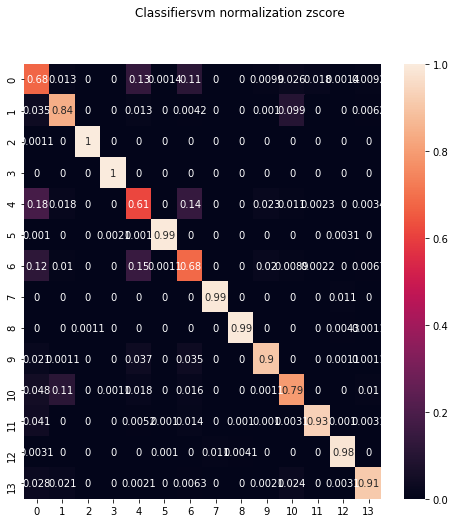

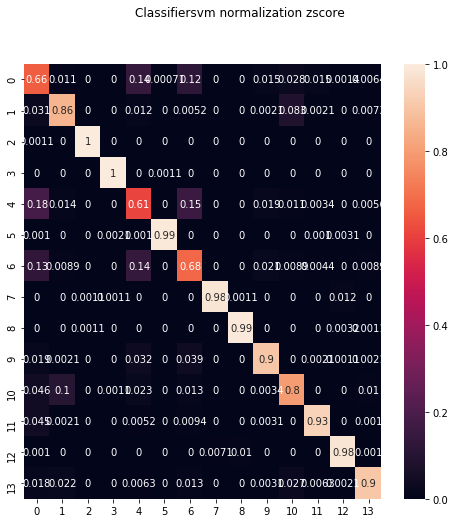

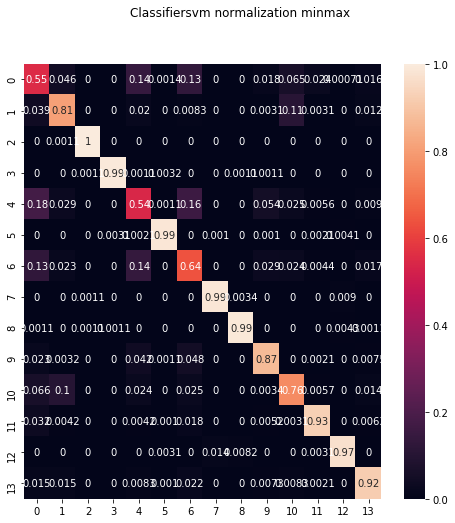

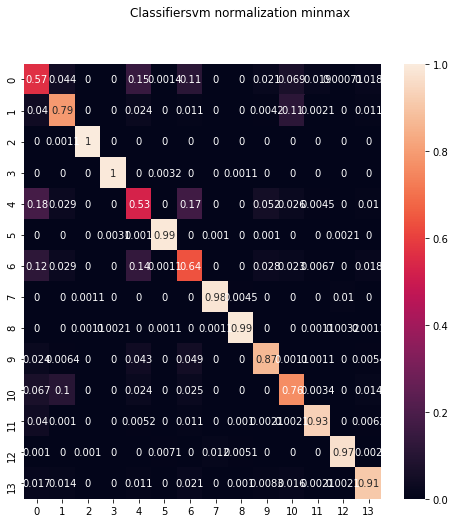

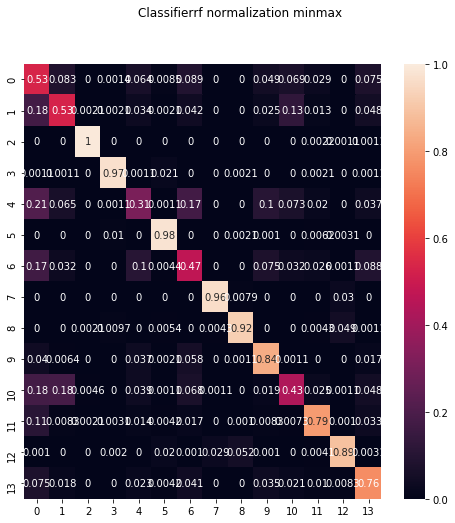

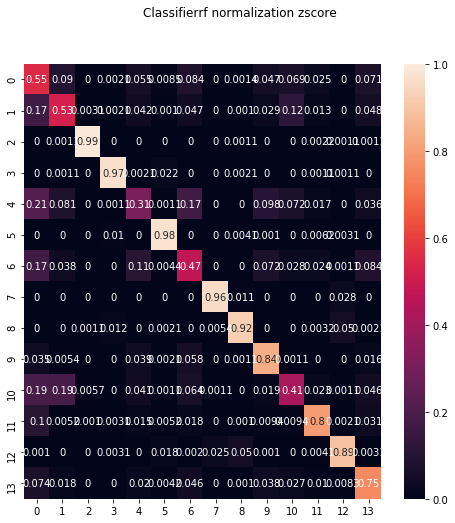

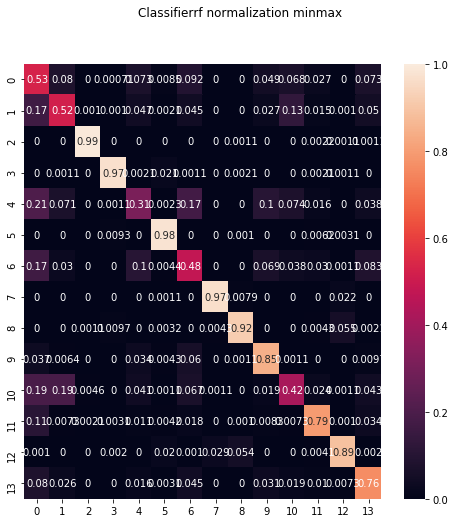

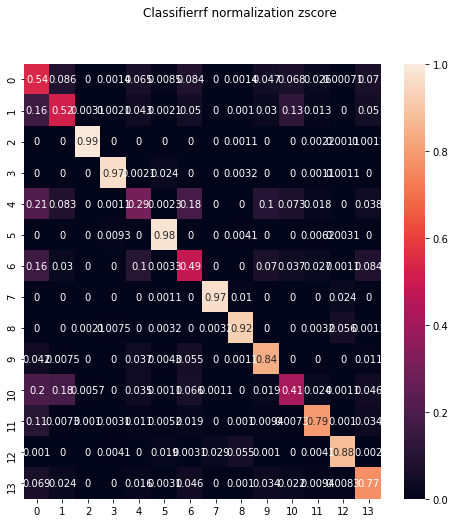

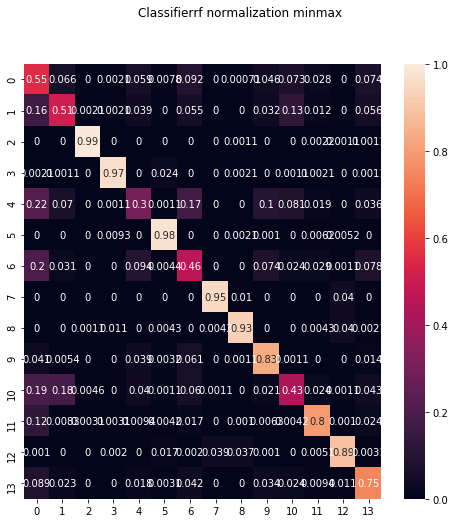

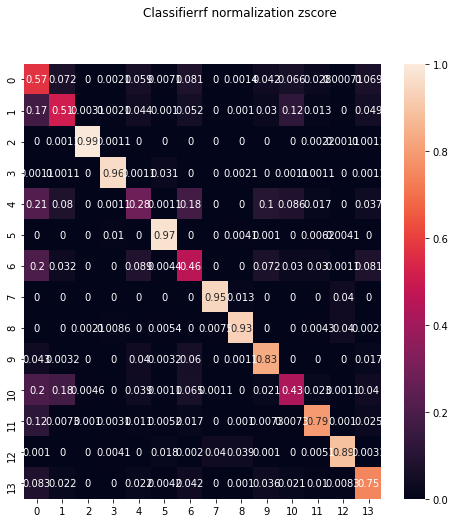

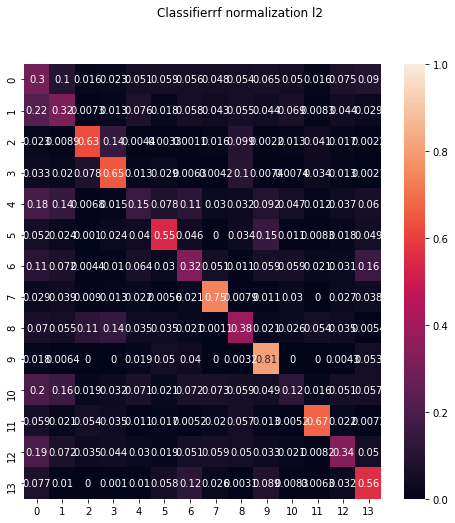

In [21]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
results_df.reset_index(inplace=True, drop=True)
for index, row in results_df.iterrows():
    if index > 10:
        break
        
    plt.figure(figsize = (20,8))
    plt.suptitle("Classifier{} normalization {}".format(row['classifier'], row['normalization']))

    plt.subplot(131)
    sns.heatmap(row['cm_train'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(132)
    sns.heatmap(row['cm_dev'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(133)
    sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)
    
    plt.show()

In [22]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)

for index, row in results_df.iterrows():
    #if row['classifier'] == 'svm':
    if True:
        print("Classifier {} normalization {}".format(row['classifier'], row['normalization']))
        print("NFFT {} Hop Size {}".format(row['nfft'], row['hop_size']))
        print("Acc train {} Acc dev {} Acc eval {}".format(row['accuracy_train'],
                                                           row['accuracy_dev'],
                                                           row['accuracy_eval']))

Classifier svm normalization zscore
NFFT 256 Hop Size 128
Acc train 0.93258263947973 Acc dev 0.8822143060536544 Acc eval 0.8795004444325016
Classifier svm normalization zscore
NFFT 128 Hop Size 64
Acc train 0.9327385870535395 Acc dev 0.8797729108205073 Acc eval 0.8787434724575977
Classifier svm normalization minmax
NFFT 128 Hop Size 64
Acc train 0.8755362968419432 Acc dev 0.8574938023621023 Acc eval 0.853283018037521
Classifier svm normalization minmax
NFFT 256 Hop Size 128
Acc train 0.878047492133366 Acc dev 0.8613128899532915 Acc eval 0.8521397232990394
Classifier rf normalization minmax
NFFT 256 Hop Size 128
Acc train 1.0 Acc dev 0.7452378961468461 Acc eval 0.7420398821267195
Classifier rf normalization zscore
NFFT 256 Hop Size 128
Acc train 1.0 Acc dev 0.744506417164093 Acc eval 0.7413672647321213
Classifier rf normalization minmax
NFFT 128 Hop Size 64
Acc train 1.0 Acc dev 0.7438655116597392 Acc eval 0.7409717585881094
Classifier rf normalization zscore
NFFT 128 Hop Size 64
Acc tr

In [ ]:
results_df